<a href="https://colab.research.google.com/github/Choesoohwan/CSH/blob/main/roboflow%2Byolov5_DeepSORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir dataset

In [3]:
!unzip /content/drive/MyDrive/data.zip -d./dataset

Archive:  /content/drive/MyDrive/data.zip
  inflating: ./dataset/images/0001_jpg.rf.15e6d64ad0edfb7e8cffe3516aeeb74b.jpg  
  inflating: ./dataset/images/0001_jpg.rf.5b89be2a8f940839e7b396ebdca3ee34.jpg  
  inflating: ./dataset/images/0001_jpg.rf.a779a71195fa0119af50006b4f6d83a7.jpg  
  inflating: ./dataset/images/0002_jpg.rf.6164ecabef9ed72f6898f3eb0a3caf54.jpg  
  inflating: ./dataset/images/0002_jpg.rf.e4d0fa7fb76193e5362f53fa9223e061.jpg  
  inflating: ./dataset/images/0002_jpg.rf.ede8b2df3fd0a00dd2bd0a67625f9306.jpg  
  inflating: ./dataset/images/0005_jpg.rf.151a343034823ecbb2e6041628073e47.jpg  
  inflating: ./dataset/images/0005_jpg.rf.68a0ef3d022edd83f290d6f9ae25086d.jpg  
  inflating: ./dataset/images/0005_jpg.rf.ccdbe9736b1b53c4ebf5d62715fe88a0.jpg  
  inflating: ./dataset/images/0016_jpg.rf.6283a6432216ef5ba70c0af8ad121ccb.jpg  
  inflating: ./dataset/images/0016_jpg.rf.6bf6e5347d9fa37f53fe1a7441be39ac.jpg  
  inflating: ./dataset/images/0026_jpg.rf.580cc79f438193375745a51e9

In [4]:
%cd / content
! git clone https://github.com/ultralytics/yolov5.git

[Errno 2] No such file or directory: '/ content'
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15005, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15005 (delta 0), reused 0 (delta 0), pack-reused 15002
Receiving objects: 100% (15005/15005), 14.03 MiB | 15.92 MiB/s, done.
Resolving deltas: 100% (10291/10291), done.


In [5]:
%cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['car', 'people']

roboflow:
  workspace: warsaw-university-of-technology-f0ldu
  project: realistic_photos_pickups_cars_buses_pedestrians
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/warsaw-university-of-technology-f0ldu/realistic_photos_pickups_cars_buses_pedestrians/dataset/3

In [6]:
%cd /
from glob import glob

img_list=glob('/content/dataset/export/images/*.jpg')
print(len(img_list))
     

/
217


In [7]:
from sklearn.model_selection import train_test_split

tarin_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(tarin_img_list), len(val_img_list))

173 44


In [8]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(tarin_img_list) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [9]:
import yaml

with open('content/dataset/data.yaml', 'r') as f:
  data=yaml.safe_load(f)
  
print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 2, 'names': ['car', 'people'], 'roboflow': {'workspace': 'warsaw-university-of-technology-f0ldu', 'project': 'realistic_photos_pickups_cars_buses_pedestrians', 'version': 3, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/warsaw-university-of-technology-f0ldu/realistic_photos_pickups_cars_buses_pedestrians/dataset/3'}}
{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'nc': 2, 'names': ['car', 'people'], 'roboflow': {'workspace': 'warsaw-university-of-technology-f0ldu', 'project': 'realistic_photos_pickups_cars_buses_pedestrians', 'version': 3, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/warsaw-university-of-technology-f0ldu/realistic_photos_pickups_cars_buses_pedestrians/dataset/3'}}


In [10]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.8 MB/s eta 0:00:00


In [11]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 40 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name object_detection_result

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=object_detection_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

detect: weights=['/content/yolov5/runs/train/object_detection_result/weights/best.pt'], source=/content/dataset/export/images/ezgif-frame-094_jpg.rf.8397f3aab9eeebcb0836130c02446f5a.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/export/images/ezgif-frame-094_jpg.rf.8397f3aab9eeebcb0836130c02446f5a.jpg: 256x416 6 cars, 5 peoples, 12.5ms
Speed: 0.3ms pre-process, 12.5ms inference, 1.6ms NMS per image at shape (1, 3, 416, 416)
Results saved

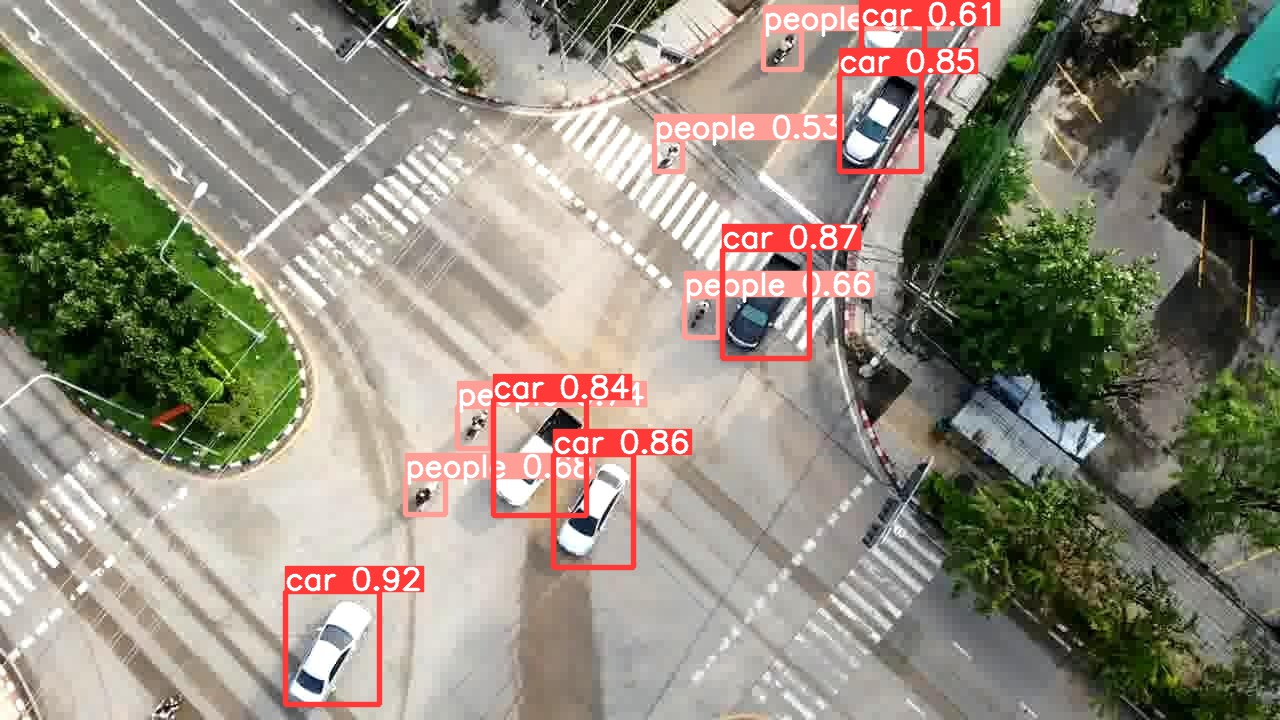

In [12]:
from IPython.display import Image, display
import os

val_img_path = val_img_list[10]

!python detect.py --weights /content/yolov5/runs/train/object_detection_result/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"
Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path)))

In [14]:
!python detect.py --source /content/drive/MyDrive/drone.mp4 --weights /content/yolov5/runs/train/object_detection_result/weights/best.pt

detect: weights=['/content/yolov5/runs/train/object_detection_result/weights/best.pt'], source=/content/drive/MyDrive/drone.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/250) /content/drive/MyDrive/drone.mp4: 384x640 29 cars, 6 peoples, 13.7ms
video 1/1 (2/250) /content/drive/MyDrive/drone.mp4: 384x640 29 cars, 8 peoples, 11.9ms
video 1/1 (3/250) /content/drive/MyDrive/drone.mp4: 384x640 29 cars, 8 peoples, 12.4ms
video 1/1 (4/250) /content/drive/My

In [16]:
%cd content/
!git clone https://github.com/HowieMa/DeepSORT_YOLOv5_Pytorch.git

%cd /content/DeepSORT_YOLOv5_Pytorch
!pip install -r requirements.txt

[Errno 2] No such file or directory: 'content/'
/content/yolov5
fatal: destination path 'DeepSORT_YOLOv5_Pytorch' already exists and is not an empty directory.
[Errno 2] No such file or directory: '/content/DeepSORT_YOLOv5_Pytorch'
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
!pip install conda
!conda create -n DeepSORT_YOLOv5_Pytorch python=3.8
!conda activate DeepSORT_YOLOv5_Pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 KB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.3/555.3 KB 50.4 MB/s eta 0:00:00
  Created wheel for conda: filename=conda-4.3.16-py3-none-any.whl size=336959 sha256=07f062d54f9e5c35726582ab529957fa3dc5dbe04f0877768e7fbc0491459661
  Stored in directory: /root/.cache/pip/wheels/6e/c5/70/e50a1a99d26cbe940549549b7601d484e0f0bc4b8f0ec49e36
  Created wheel for pycosat: filename=pycosat-0.6.3-cp38-cp38-linux_x86_64.whl size=170333 sha256=6c6e7de26e76ff484d8c497dfb7b72c53b2b04c11a8237a7cb71d86f3e4a8ff7
  Stored in directory: /root/.cache/pip/wheels/71/5b/2d/0a9247760f0f008abc0

In [41]:
%cd /content/yolov5/DeepSORT_YOLOv5_Pytorch/
!python main.py --input_path ./content/drive/MyDrive/drone.mp4 --save_path ./content/yolov5/DeepSORT_YOLOv5_Pytorch/runs --weights /content/yolov5/runs/train/object_detection_result/weights/best.pt  --models /content/yolov5/models/yolo.py

/content/yolov5/DeepSORT_YOLOv5_Pytorch
usage: main.py
       [-h]
       [--input_path INPUT_PATH]
       [--save_path SAVE_PATH]
       [--frame_interval FRAME_INTERVAL]
       [--fourcc FOURCC]
       [--device DEVICE]
       [--save_txt SAVE_TXT]
       [--display]
       [--display_width DISPLAY_WIDTH]
       [--display_height DISPLAY_HEIGHT]
       [--camera CAM]
       [--weights WEIGHTS]
       [--img-size IMG_SIZE]
       [--conf-thres CONF_THRES]
       [--iou-thres IOU_THRES]
       [--classes CLASSES [CLASSES ...]]
       [--agnostic-nms]
       [--augment]
       [--config_deepsort CONFIG_DEEPSORT]
main.py: error: unrecognized arguments: --models /content/yolov5/models/yolo.py
